In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

print('Okay!')

Okay!


## State-robust adversarial training of TD3 algorithms

For all the figures showing the average returns during training, the curves are uniformly smoothed with a window size of 100. We also use light color region to show the standard deviation in the windows.

All algorithms are evaluated under the following two circumstances:
- Hyper-parameters variation (HV): the agents are trained on standard environments and evaluated under numbers of different relative mass values
- Noisy transition (NT): the agents are trained on normal environments, and all observations are polluted by isotropic random Gaussian noise during evaluating

Each group of the experimental results is obtained via calculating the mean and standard deviation over 100 consecutive trials. Similarly, the standard deviation is showed with light color region.

In [2]:
import os

def log2dict(fname):
    with open(fname, 'r') as fd:
        content = fd.readlines()
    ret = []
    for line in content:
        line = line.replace(',', '')
        itemdict = {}
        kvps = line.split(' ')
        for kv in kvps:
            key, value = kv.split('=')
            itemdict[key] = value
        ret.append(itemdict)
    return ret


log_filename_noise = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/eval_noise.log'
log_filename_noise_bak = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_noise.log'
if os.path.exists(log_filename_noise):
    loginfo_noise = log2dict(log_filename_noise)
    loginfo_noise_bak = log2dict(log_filename_noise_bak)
    print(len(loginfo_noise), len(loginfo_noise_bak))
else:
    print('skip')

22 11


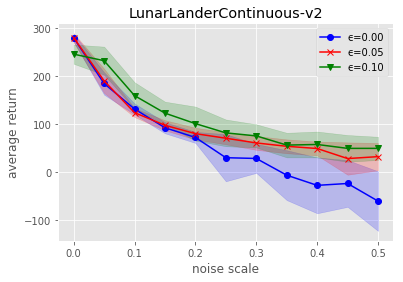

In [27]:
def draw_logs_noise(loginfo, loginfo_bak, env_name='LunarLanderContinuous-v2'):
    td3_xs = [float(x['noise_scale']) for x in loginfo if x['policy'] == 'td3']
    td3_ys = [x['result'] for x in loginfo if x['policy'] == 'td3']
    td3_ys_mean = [float(x.split('±')[0]) for x in td3_ys]
    td3_ys_half_std = [float(x.split('±')[-1]) for x in td3_ys]
    td3_ys_mean, td3_ys_half_std = np.array(td3_ys_mean), np.array(td3_ys_half_std)
    td3_lower = td3_ys_mean - td3_ys_half_std
    td3_upper = td3_ys_mean + td3_ys_half_std
    
    adv_xs = [float(x['noise_scale']) for x in loginfo if x['policy'] == 'adv']
    adv_ys = [x['result'] for x in loginfo if x['policy'] == 'adv']
    adv_ys_mean = [float(x.split('±')[0]) for x in adv_ys]
    adv_ys_half_std = [float(x.split('±')[-1]) for x in adv_ys]
    adv_ys_mean, adv_ys_half_std = np.array(adv_ys_mean), np.array(adv_ys_half_std)
    adv_lower = adv_ys_mean - adv_ys_half_std
    adv_upper = adv_ys_mean + adv_ys_half_std
    
    bak_xs = [float(x['noise_scale']) for x in loginfo_bak if x['policy'] == 'adv']
    bak_ys = [x['result'] for x in loginfo_bak if x['policy'] == 'adv']
    bak_ys_mean = [float(x.split('±')[0]) for x in bak_ys]
    bak_ys_half_std = [float(x.split('±')[-1]) for x in bak_ys]
    bak_ys_mean, bak_ys_half_std = np.array(bak_ys_mean), np.array(bak_ys_half_std)
    bak_lower = bak_ys_mean - bak_ys_half_std
    bak_upper = bak_ys_mean + bak_ys_half_std
    
    # draw figure
    plt.style.use('ggplot')
    
    plt.figure()
    plt.plot(td3_xs, td3_ys_mean, linewidth='1.5', color='blue', marker='o')
    plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
    plt.plot(adv_xs, adv_ys_mean, linewidth='1.5', color='red', marker='x')
    plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
    plt.plot(bak_xs, bak_ys_mean, linewidth='1.5', color='green', marker='v')
    plt.fill_between(bak_xs, bak_lower, bak_upper, color='green', alpha=0.2)
    plt.legend(['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'])
    plt.xlabel('noise scale')
    plt.ylabel('average return')
    plt.title(env_name)
    plt.savefig('./images/{}_noise_comp.png'.format(env_name), format='png')
    plt.show()
    
    
draw_logs_noise(loginfo_noise, loginfo_noise_bak)

In [18]:
# get the integral under the generalization curves
def get_integral(ys_list_mean, xdiff=0.05):
    area = 0.0
    for idx in range(1, len(ys_list_mean)):
        this_area = (ys_list_mean[idx] + ys_list_mean[idx - 1]) * xdiff * 0.5
        area += this_area
    return area

def get_lunar_logs_noise_integral(loginfo, loginfo_bak):
    td3_xs = [float(x['noise_scale']) for x in loginfo if x['policy'] == 'td3']
    td3_ys = [x['result'] for x in loginfo if x['policy'] == 'td3']
    td3_ys_mean = [float(x.split('±')[0]) for x in td3_ys]
    td3_area = get_integral(td3_ys_mean)
    print('epsilon=0.00\t\t area={}'.format(td3_area))
    
    adv_xs = [float(x['noise_scale']) for x in loginfo if x['policy'] == 'adv']
    adv_ys = [x['result'] for x in loginfo if x['policy'] == 'adv']
    adv_ys_mean = [float(x.split('±')[0]) for x in adv_ys]
    adv_area = get_integral(adv_ys_mean)
    print('epsilon=0.05\t\t area={}'.format(adv_area))
    
    bak_xs = [float(x['noise_scale']) for x in loginfo_bak if x['policy'] == 'adv']
    bak_ys = [x['result'] for x in loginfo_bak if x['policy'] == 'adv']
    bak_ys_mean = [float(x.split('±')[0]) for x in bak_ys]
    bak_area = get_integral(bak_ys_mean)
    print('epsilon=0.10\t\t area={}'.format(bak_area))
    return td3_area, adv_area, bak_area


area_info = get_lunar_logs_noise_integral(loginfo_noise, loginfo_noise_bak)

epsilon=0.00		 area=29.75826435089112
epsilon=0.05		 area=45.69323635101319
epsilon=0.10		 area=54.33368263244629


3465 3758 3296 2790 2491


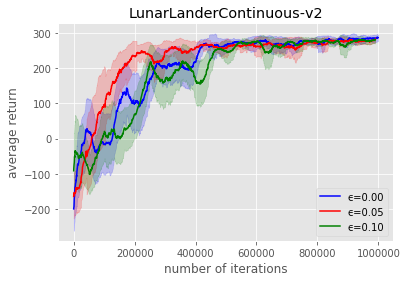

In [15]:
log_filename_learning_td3 = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/td3_LunarLanderContinuous-v2_4.log'
log_filename_learning_adv = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/adv_LunarLanderContinuous-v2_0.log'
log_filename_learning_bak = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/adv_LunarLanderContinuous-v2_0.log'
log_filename_learning_ens = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble/logs/td3_LunarLanderContinuous-v2_4.log'
log_filename_learning_sir = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble_regularized/logs/adv_LunarLanderContinuous-v2_0.log'

loginfo_learning_td3 = log2dict(log_filename_learning_td3)
loginfo_learning_adv = log2dict(log_filename_learning_adv)
loginfo_learning_bak = log2dict(log_filename_learning_bak)
loginfo_learning_ens = log2dict(log_filename_learning_ens)
loginfo_learning_sir = log2dict(log_filename_learning_sir)

print(len(loginfo_learning_td3), len(loginfo_learning_adv), len(loginfo_learning_bak),
      len(loginfo_learning_ens), len(loginfo_learning_sir))

def ema_smoothing(nums, ratio=0.98):
    import math
    arr = np.array(nums, dtype=np.float32)
    ret_mean, ret_std = np.zeros(arr.shape, dtype=arr.dtype), np.zeros(arr.shape, dtype=arr.dtype)
    running_mean = nums[0]
    running_std = 0.0
    for idx, n in enumerate(nums):
        running_mean = ratio * running_mean + (1.0 - ratio) * n
        running_std = ratio * running_std + (1.0 - ratio) * math.sqrt((n - running_mean) ** 2)
        ret_mean[idx] = running_mean
        ret_std[idx] = running_std
    ret_std /= 2.0
    return ret_mean, ret_std


def uniform_smoothing(nums, winsize=100):
    arr = np.array(nums, dtype=np.float32)
    size = winsize // 2
    ret_mean, ret_std = np.zeros(arr.shape, dtype=arr.dtype), np.zeros(arr.shape, dtype=arr.dtype)
    for idx, n in enumerate(nums):
        left, right = max(0, idx - size), min(idx + size, len(nums))
        meanval = arr[left: right].mean()
        stdval = arr[left: right].std()
        ret_mean[idx] = meanval
        ret_std[idx] = stdval
    ret_std /= 2.0
    return ret_mean, ret_std
    

def draw_logs_learning(log1, log2, log3, smooth_func=uniform_smoothing, env_name='LunarLanderContinuous-v2'):
    td3_xs = [int(x['iter']) for x in log1]
    td3_ys = [float(x['total_reward']) for x in log1]
    adv_xs = [int(x['iter']) for x in log2]
    adv_ys = [float(x['total_reward']) for x in log2]
    bak_xs = [int(x['iter']) for x in log3]
    bak_ys = [float(x['total_reward']) for x in log3]
    ens_xs = [int(x['iter']) for x in loginfo_learning_ens]
    ens_ys = [float(x['total_reward']) for x in loginfo_learning_ens]
    sir_xs = [int(x['iter']) for x in loginfo_learning_sir]
    sir_ys = [float(x['total_reward']) for x in loginfo_learning_sir]
    
    # processing mean and std
    td3_ys_mean, td3_ys_std = smooth_func(td3_ys)
    td3_lower, td3_upper = td3_ys_mean - td3_ys_std, td3_ys_mean + td3_ys_std
    adv_ys_mean, adv_ys_std = smooth_func(adv_ys)
    adv_lower, adv_upper = adv_ys_mean - adv_ys_std, adv_ys_mean + adv_ys_std
    bak_ys_mean, bak_ys_std = smooth_func(bak_ys)
    bak_lower, bak_upper = bak_ys_mean - bak_ys_std, bak_ys_mean + bak_ys_std
    ens_ys_mean, ens_ys_std = smooth_func(ens_ys)
    ens_lower, ens_upper = ens_ys_mean - ens_ys_std, ens_ys_mean + ens_ys_std
    sir_ys_mean, sir_ys_std = smooth_func(sir_ys)
    sir_lower, sir_upper = sir_ys_mean - sir_ys_std, sir_ys_mean + sir_ys_std
    
    plt.figure()
    plt.plot(td3_xs, td3_ys_mean, color='blue')
    plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
    plt.plot(adv_xs, adv_ys_mean, color='red')
    plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
    plt.plot(bak_xs, bak_ys_mean, color='green')
    plt.fill_between(bak_xs, bak_lower, bak_upper, color='green', alpha=0.2)
#     plt.plot(ens_xs, ens_ys_mean, color='orange')
#     plt.fill_between(ens_xs, ens_lower, ens_upper, color='orange', alpha=0.1)
#     plt.plot(sir_xs, sir_ys_mean, color='purple')
#     plt.fill_between(sir_xs, sir_lower, sir_upper, color='purple', alpha=0.1)
    plt.legend(['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'], loc='best')
    plt.xlabel('number of iterations')
    plt.ylabel('average return')
    plt.title(env_name)
    plt.savefig('./images/{}_learning_comp.png'.format(env_name), format='png')
    plt.show()
    plt.close()
    
    
draw_logs_learning(loginfo_learning_td3, loginfo_learning_adv, loginfo_learning_bak)

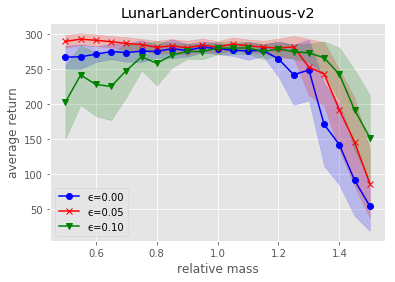

In [8]:
log_filename_mass = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs/eval_mass_cpu.log'
log_filename_mass_bak = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs/eval_mass.log'
loginfo_mass = log2dict(log_filename_mass)
loginfo_mass_bak = log2dict(log_filename_mass_bak)

def draw_logs_mass(loginfo, loginfo_bak, env_name='LunarLanderContinuous-v2'):
    td3_xs = [float(x['relative_mass']) for x in loginfo if x['policy'] == 'td3']
    adv_xs = [float(x['relative_mass']) for x in loginfo if x['policy'] == 'adv']
    bak_xs = [float(x['relative_mass']) for x in loginfo_bak]
    td3_ys = [x['result'] for x in loginfo if x['policy'] == 'td3']
    adv_ys = [x['result'] for x in loginfo if x['policy'] == 'adv']
    bak_ys = [x['result'] for x in loginfo_bak]
    td3_ys_mean = [float(x.split('±')[0]) for x in td3_ys]
    td3_ys_std = [float(x.split('±')[-1]) for x in td3_ys]
    adv_ys_mean = [float(x.split('±')[0]) for x in adv_ys]
    adv_ys_std = [float(x.split('±')[-1]) for x in adv_ys]
    bak_ys_mean = [float(x.split('±')[0]) for x in bak_ys]
    bak_ys_std = [float(x.split('±')[-1]) for x in bak_ys]
    
    td3_lower = np.array(td3_ys_mean) - np.array(td3_ys_std)
    td3_upper = np.array(td3_ys_mean) + np.array(td3_ys_std)
    adv_lower = np.array(adv_ys_mean) - np.array(adv_ys_std)
    adv_upper = np.array(adv_ys_mean) + np.array(adv_ys_std)
    bak_lower = np.array(bak_ys_mean) - np.array(bak_ys_std)
    bak_upper = np.array(bak_ys_mean) + np.array(bak_ys_std)
    
    plt.style.use('ggplot')
    
    plt.figure()
    plt.plot(td3_xs, td3_ys_mean, linewidth='1.5', color='blue', marker='o')
    plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
    plt.plot(bak_xs, bak_ys_mean, linewidth='1.5', color='red', marker='x')
    plt.fill_between(bak_xs, bak_lower, bak_upper, color='red', alpha=0.2)
    plt.plot(adv_xs, adv_ys_mean, linewidth='1.5', color='green', marker='v')
    plt.fill_between(adv_xs, adv_lower, adv_upper, color='green', alpha=0.2)
    plt.legend(['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'])
    plt.xlabel('relative mass')
    plt.ylabel('average return')
    plt.title(env_name)
    plt.savefig('./images/{}_mass_comp.png'.format(env_name), format='png')
    plt.show()
    
    
draw_logs_mass(loginfo_mass, loginfo_mass_bak)

In [7]:
def get_lunar_logs_mass_integral(loginfo, loginfo_bak):
    td3_xs = [float(x['relative_mass']) for x in loginfo if x['policy'] == 'td3']
    adv_xs = [float(x['relative_mass']) for x in loginfo if x['policy'] == 'adv']
    bak_xs = [float(x['relative_mass']) for x in loginfo_bak]
    td3_ys = [x['result'] for x in loginfo if x['policy'] == 'td3']
    adv_ys = [x['result'] for x in loginfo if x['policy'] == 'adv']
    bak_ys = [x['result'] for x in loginfo_bak]
    td3_ys_mean = [float(x.split('±')[0]) for x in td3_ys]
    adv_ys_mean = [float(x.split('±')[0]) for x in adv_ys]
    bak_ys_mean = [float(x.split('±')[0]) for x in bak_ys]
    
    td3_area = get_integral(td3_ys_mean)
    adv_area = get_integral(adv_ys_mean)
    bak_area = get_integral(bak_ys_mean)
    print('epsilon=0.00\t\t area={}'.format(td3_area))
    print('epsilon=0.05\t\t area={}'.format(adv_area))
    print('epsilon=0.10\t\t area={}'.format(bak_area))
    return td3_area, adv_area, bak_area


lunar_mass_info = get_lunar_logs_mass_integral(loginfo_mass, loginfo_mass_bak)

epsilon=0.00		 area=245.5468029975891
epsilon=0.05		 area=255.77381858825686
epsilon=0.10		 area=264.8361886978149


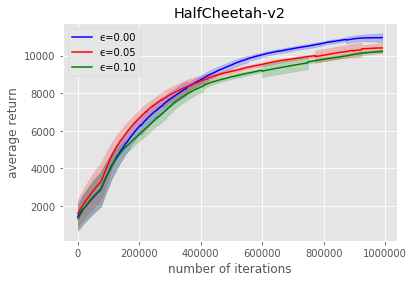

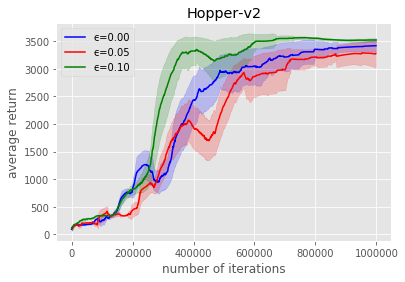

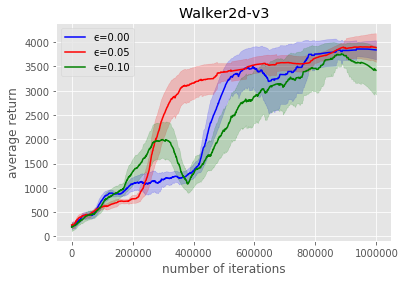

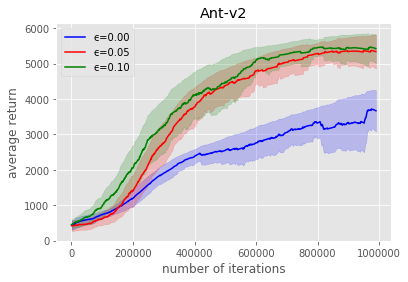

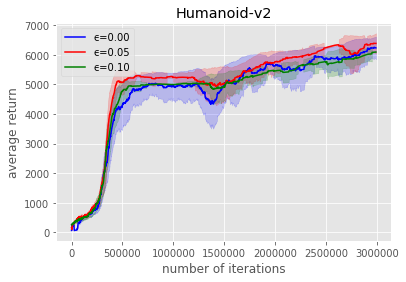

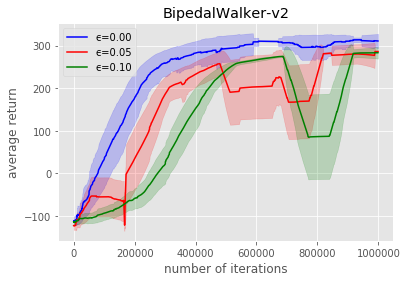

In [10]:
# draw mujoco learning curves
def draw_learning_mujoco(seed=0):
    import os
    env_name_list = ['HalfCheetah-v2', 'Hopper-v2', 'Walker2d-v3', 'Ant-v2', 'Humanoid-v2', 'BipedalWalker-v2']
    td3_seed_list = [0, 9, 2, 2, 3, 9]
    adv_seed_list = [4, 5, 3, 7, 1, 0]
    bak_seed_list = [9, 3, 7, 8, 1, 2]
    ens_seed_list = [1, 1, 1, 1, 1, 1]
    sir_seed_list = [1, 1, 1, 1, 1, 1]
    
    for idx, env_name in enumerate(env_name_list):
        td3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/td3_{}_{}.log'
        td3_logname = td3_logname.format(env_name, td3_seed_list[idx])
        adv_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs/adv_{}_{}.log'
        adv_logname = adv_logname.format(env_name, adv_seed_list[idx])
        bak_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_baseline/logs/adv_{}_{}.log'
        bak_logname = bak_logname.format(env_name, bak_seed_list[idx])
        
        td3_loginfo = log2dict(td3_logname)
        adv_loginfo = log2dict(adv_logname)
        bak_loginfo = log2dict(bak_logname)
        
        draw_logs_learning(td3_loginfo, adv_loginfo, bak_loginfo, env_name=env_name)
        #print('draw figure {}'.format(env_name))
        
        
draw_learning_mujoco()

title=LunarLanderContinuous-v2		 legend=ϵ=0.00		 area=245.54680366516112
title=LunarLanderContinuous-v2		 legend=ϵ=0.05		 area=255.77382202148436
title=LunarLanderContinuous-v2		 legend=ϵ=0.10		 area=264.8361885070801


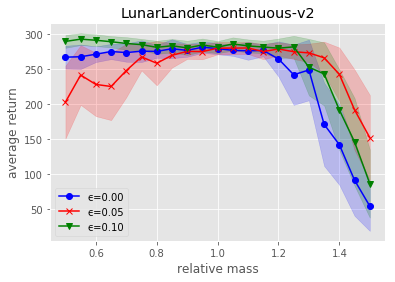

title=LunarLanderContinuous-v2		 legend=ϵ=0.00		 area=-13.12446689605713
title=LunarLanderContinuous-v2		 legend=ϵ=0.05		 area=24.96747343540192
title=LunarLanderContinuous-v2		 legend=ϵ=0.10		 area=-1.3877471446990972


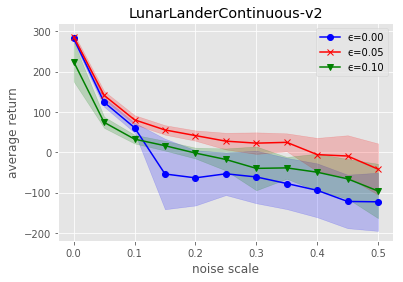

title=Walker2d-v3		 legend=ϵ=0.00		 area=2781.1702941894537
title=Walker2d-v3		 legend=ϵ=0.05		 area=3541.7354003906253
title=Walker2d-v3		 legend=ϵ=0.10		 area=3690.657373046875


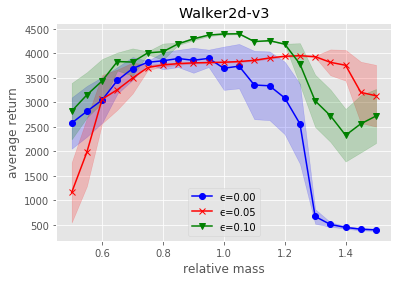

title=Walker2d-v3		 legend=ϵ=0.00		 area=396.2430793762207
title=Walker2d-v3		 legend=ϵ=0.05		 area=741.7052497863771
title=Walker2d-v3		 legend=ϵ=0.10		 area=687.9885223388673


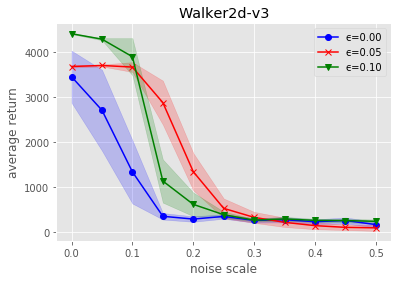

title=Ant-v2		 legend=ϵ=0.00		 area=3556.133459472657
title=Ant-v2		 legend=ϵ=0.05		 area=5495.180590820311
title=Ant-v2		 legend=ϵ=0.10		 area=5941.073388671875


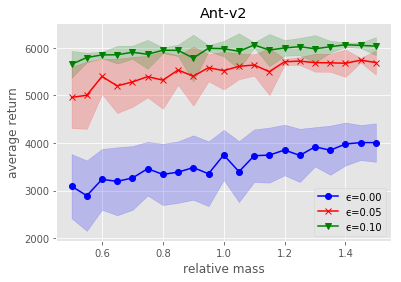

title=Ant-v2		 legend=ϵ=0.00		 area=445.3470817565919
title=Ant-v2		 legend=ϵ=0.05		 area=507.97897987365747
title=Ant-v2		 legend=ϵ=0.10		 area=618.0055793762206


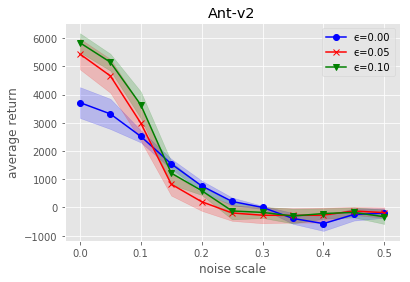

title=HalfCheetah-v2		 legend=ϵ=0.00		 area=8705.895971679689
title=HalfCheetah-v2		 legend=ϵ=0.05		 area=8880.6337890625
title=HalfCheetah-v2		 legend=ϵ=0.10		 area=8751.479736328125


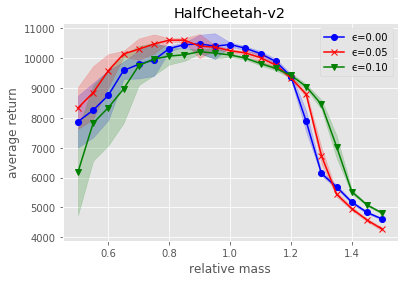

title=HalfCheetah-v2		 legend=ϵ=0.00		 area=1000.7734072685244
title=HalfCheetah-v2		 legend=ϵ=0.05		 area=1165.288264274597
title=HalfCheetah-v2		 legend=ϵ=0.10		 area=1205.3895294189456


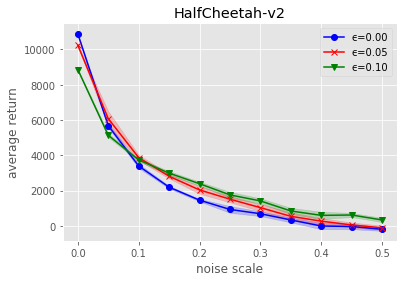

title=Hopper-v2		 legend=ϵ=0.00		 area=2640.692639160156
title=Hopper-v2		 legend=ϵ=0.05		 area=3087.554748535156
title=Hopper-v2		 legend=ϵ=0.10		 area=2927.16664428711


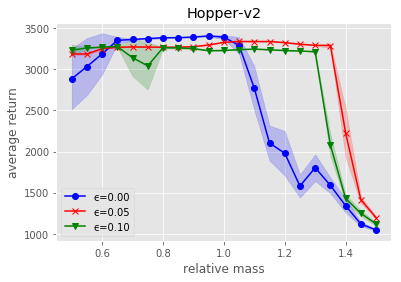

title=Hopper-v2		 legend=ϵ=0.00		 area=474.02681045532233
title=Hopper-v2		 legend=ϵ=0.05		 area=528.3055778503418
title=Hopper-v2		 legend=ϵ=0.10		 area=493.4433467864991


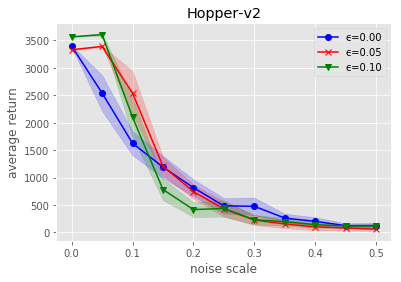

title=Humanoid-v2		 legend=ϵ=0.00		 area=4389.074407958985
title=Humanoid-v2		 legend=ϵ=0.05		 area=4458.082029724121
title=Humanoid-v2		 legend=ϵ=0.10		 area=4709.537463378907


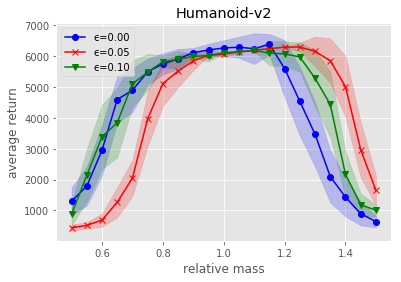

title=Humanoid-v2		 legend=ϵ=0.00		 area=1853.010498046875
title=Humanoid-v2		 legend=ϵ=0.05		 area=1024.9239410400392
title=Humanoid-v2		 legend=ϵ=0.10		 area=1238.06085357666


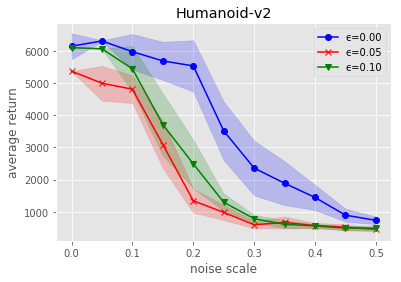

In [19]:
# draw adv test (including mass and noise)

def get_mean_std(loginfo, filter_func, xname='relative_mass', yname='result', xtype=float):
    """get_mean_std
        filter_func should be a callable function
        xtype should be either float or int
    """
    loginfo_required = list(filter(filter_func, loginfo))
    xs = [xtype(x[xname]) for x in loginfo_required]
    ys = [x[yname] for x in loginfo_required]
    ys_mean = [float(x.split('±')[0]) for x in ys]
    ys_std = [float(x.split('±')[-1]) for x in ys]
    ys_mean = np.array(ys_mean, dtype=np.float32)
    
    ys_std = np.array(ys_std, dtype=np.float32)
    ys_lower = ys_mean - ys_std
    ys_upper = ys_mean + ys_std
    return xs, ys_mean, ys_lower, ys_upper


def draw_mujoco_mass_noise_test():
    def draw_figure(xs_list, ys_mean_list, ys_lower_list, ys_upper_list, legends, 
                    colors, markers, xlabel, ylabel, title, figname):
        plt.style.use('ggplot')
        plt.figure()
        for xs, ys, lower, upper, clr, mk in zip(xs_list, ys_mean_list, ys_lower_list, ys_upper_list, colors, markers):
            plt.plot(xs, ys, linewidth=1.5, color=clr, marker=mk)
            plt.fill_between(xs, lower, upper, color=clr, alpha=0.2)
        for ys, ledg in zip(ys_mean_list, legends):
            area = get_integral(ys)
            print('title={}\t\t legend={}\t\t area={}'.format(title, ledg, area))
        plt.legend(legends, loc='best')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        #plt.savefig(figname + '.png', format='png')
        plt.show()
        plt.close()
        
    # log files: epsilon=0
    log_filename_mass_td3 = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_mass_all.log'
    log_filename_noise_td3 = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_noise_all.log'
    loginfo_mujoco_mass_td3 = log2dict(log_filename_mass_td3)
    loginfo_mujoco_noise_td3 = log2dict(log_filename_noise_td3)

    # log files: epsilon=0.05
    log_filename_mass_adv = '/home/ymx/Documents/newcodes/Fujimoto_TD3_adv_test/logs/eval_mass_all.log'
    log_filename_noise_adv = '/home/ymx/Documents/newcodes/Fujimoto_TD3_adv_test/logs/eval_noise_all.log'
    loginfo_mujoco_mass_adv = log2dict(log_filename_mass_adv)
    loginfo_mujoco_noise_adv = log2dict(log_filename_noise_adv)
    
    # log files: epsilon=0.10
    log_filename_mass_bak = '/home/ymx/Documents/newcodes/Fujimoto_TD3_baseline/logs/eval_mass_all.log'
    log_filename_noise_bak = '/home/ymx/Documents/newcodes/Fujimoto_TD3_baseline/logs/eval_noise_all.log'
    loginfo_mujoco_mass_bak = log2dict(log_filename_mass_bak)
    loginfo_mujoco_noise_bak = log2dict(log_filename_noise_bak)

    env_name_list = ['LunarLanderContinuous-v2', 'Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2']
    td3_seed_list_mass  = [0, 2, 2, 3, 1, 3]
    adv_seed_list_mass  = [0, 3, 0, 2, 2, 0]
    bak_seed_list_mass  = [0, 6, 8, 3, 9, 1]
    td3_seed_list_noise = [0, 2, 2, 2, 1, 3]
    adv_seed_list_noise = [0, 2, 0, 2, 2, 3]
    bak_seed_list_noise = [0, 6, 8, 0, 3, 1]
    for idx, td3_seed, adv_seed, td3_seed_noise, adv_seed_noise, env_name in zip(list(range(6)), 
                                                                                 td3_seed_list_mass, 
                                                                                 adv_seed_list_mass, 
                                                                                 td3_seed_list_noise, 
                                                                                 adv_seed_list_noise, 
                                                                                 env_name_list):
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(td3_seed) and x['policy'] == 'td3'
        td3_xs, td3_ys_mean, td3_lower, td3_upper = get_mean_std(loginfo_mujoco_mass_td3, this_env_filter)
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(adv_seed) and x['policy'] == 'adv'
        adv_xs, adv_ys_mean, adv_lower, adv_upper = get_mean_std(loginfo_mujoco_mass_adv, this_env_filter)
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(bak_seed_list_mass[idx])
        bak_xs, bak_ys_mean, bak_lower, bak_upper = get_mean_std(loginfo_mujoco_mass_bak, this_env_filter)

        draw_figure(xs_list=[td3_xs, adv_xs, bak_xs],
                    ys_mean_list=[td3_ys_mean, adv_ys_mean, bak_ys_mean],
                    ys_lower_list=[td3_lower, adv_lower, bak_lower],
                    ys_upper_list=[td3_upper, adv_upper, bak_upper],
                    legends=['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'],
                    colors=['blue', 'red', 'green'],
                    markers=['o', 'x', 'v'],
                    xlabel='relative mass',
                    ylabel='average return',
                    title=env_name, 
                    figname='./images/mujoco_{}_mass_'.format(env_name))
        
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(td3_seed_noise) and x['policy'] == 'td3'
        td3_xs, td3_ys_mean, td3_lower, td3_upper = get_mean_std(loginfo_mujoco_noise_td3, 
                                                                 this_env_filter, 
                                                                 xname='noise_scale')
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(adv_seed_noise) and x['policy'] == 'adv'
        adv_xs, adv_ys_mean, adv_lower, adv_upper = get_mean_std(loginfo_mujoco_noise_adv, 
                                                                 this_env_filter, 
                                                                 xname='noise_scale')
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(bak_seed_list_noise[idx]) and x['policy'] == 'adv'
        bak_xs, bak_ys_mean, bak_lower, bak_upper = get_mean_std(loginfo_mujoco_noise_bak, 
                                                                 this_env_filter, 
                                                                 xname='noise_scale')

        draw_figure(xs_list=[td3_xs, adv_xs, bak_xs],
                    ys_mean_list=[td3_ys_mean, adv_ys_mean, bak_ys_mean],
                    ys_lower_list=[td3_lower, adv_lower, bak_lower],
                    ys_upper_list=[td3_upper, adv_upper, bak_upper],
                    legends=['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'],
                    colors=['blue', 'red', 'green'],
                    markers=['o', 'x', 'v'],
                    xlabel='noise scale',
                    ylabel='average return',
                    title=env_name, 
                    figname='./images/mujoco_{}_noise_'.format(env_name))
        
        
draw_mujoco_mass_noise_test()

title=LunarLanderContinuous-v2		 legend=TD3		 area=245.54680366516112
title=LunarLanderContinuous-v2		 legend=SIR-TD3		 area=255.77382202148436
title=LunarLanderContinuous-v2		 legend=Ensemble		 area=271.86677703857424
title=LunarLanderContinuous-v2		 legend=Ensemble+SIR		 area=271.16144714355465


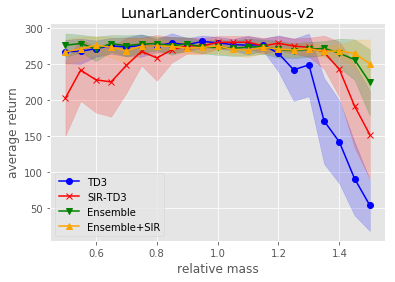

title=LunarLanderContinuous-v2		 legend=TD3		 area=-13.12446689605713
title=LunarLanderContinuous-v2		 legend=SIR-TD3		 area=24.96747343540192
title=LunarLanderContinuous-v2		 legend=Ensemble		 area=-3.4047635078430147
title=LunarLanderContinuous-v2		 legend=Ensemble+SIR		 area=16.883363747596743


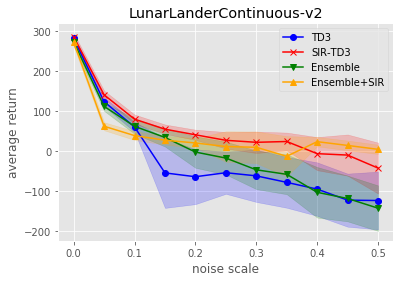

title=Walker2d-v3		 legend=TD3		 area=2781.1702941894537
title=Walker2d-v3		 legend=SIR-TD3		 area=3541.7354003906253
title=Walker2d-v3		 legend=Ensemble		 area=4428.24931640625
title=Walker2d-v3		 legend=Ensemble+SIR		 area=4564.766186523438


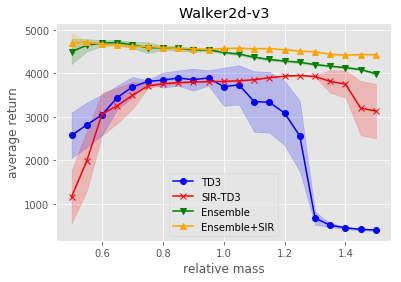

title=Walker2d-v3		 legend=TD3		 area=396.2430793762207
title=Walker2d-v3		 legend=SIR-TD3		 area=985.4401657104493
title=Walker2d-v3		 legend=Ensemble		 area=584.5175338745116
title=Walker2d-v3		 legend=Ensemble+SIR		 area=693.8237091064454


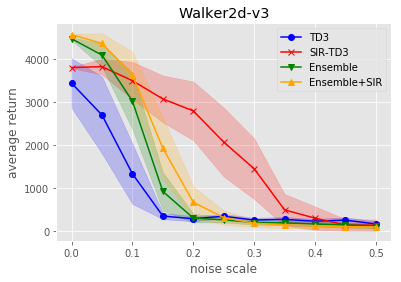

title=Ant-v2		 legend=TD3		 area=3556.133459472657
title=Ant-v2		 legend=SIR-TD3		 area=5495.180590820311
title=Ant-v2		 legend=Ensemble		 area=6543.261059570313
title=Ant-v2		 legend=Ensemble+SIR		 area=5817.265551757812


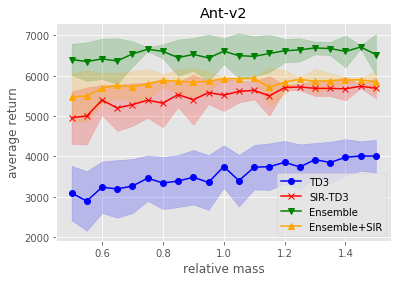

title=Ant-v2		 legend=TD3		 area=445.3470817565919
title=Ant-v2		 legend=SIR-TD3		 area=507.97897987365747
title=Ant-v2		 legend=Ensemble		 area=335.98223533630375
title=Ant-v2		 legend=Ensemble+SIR		 area=272.7237136840821


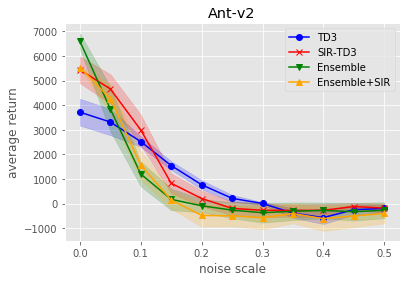

title=HalfCheetah-v2		 legend=TD3		 area=8705.895971679689
title=HalfCheetah-v2		 legend=SIR-TD3		 area=8880.6337890625
title=HalfCheetah-v2		 legend=Ensemble		 area=11004.630517578127
title=HalfCheetah-v2		 legend=Ensemble+SIR		 area=11322.534960937499


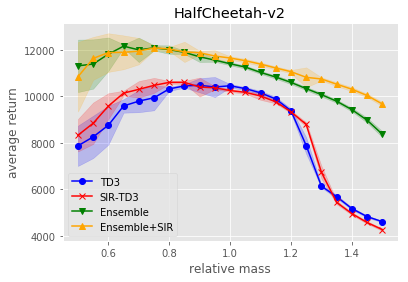

title=HalfCheetah-v2		 legend=TD3		 area=1000.7734072685244
title=HalfCheetah-v2		 legend=SIR-TD3		 area=1165.288264274597
title=HalfCheetah-v2		 legend=Ensemble		 area=681.3506741523742
title=HalfCheetah-v2		 legend=Ensemble+SIR		 area=822.010553741455


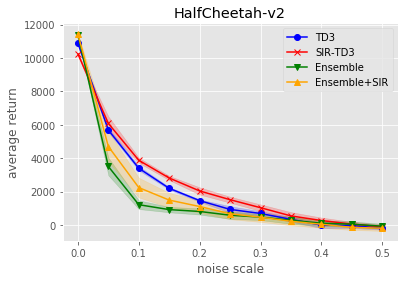

title=Hopper-v2		 legend=TD3		 area=2640.692639160156
title=Hopper-v2		 legend=SIR-TD3		 area=3087.554748535156
title=Hopper-v2		 legend=Ensemble		 area=1993.4077392578129
title=Hopper-v2		 legend=Ensemble+SIR		 area=3472.278527832031


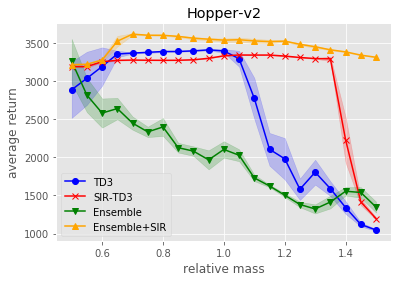

title=Hopper-v2		 legend=TD3		 area=474.02681045532233
title=Hopper-v2		 legend=SIR-TD3		 area=528.3055778503418
title=Hopper-v2		 legend=Ensemble		 area=303.6281867980957
title=Hopper-v2		 legend=Ensemble+SIR		 area=276.04340476989745


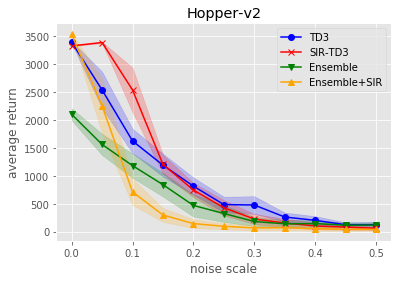

title=Humanoid-v2		 legend=TD3		 area=4389.074407958985
title=Humanoid-v2		 legend=SIR-TD3		 area=4458.082029724121
title=Humanoid-v2		 legend=Ensemble		 area=5301.459765625001
title=Humanoid-v2		 legend=Ensemble+SIR		 area=5793.810327148438


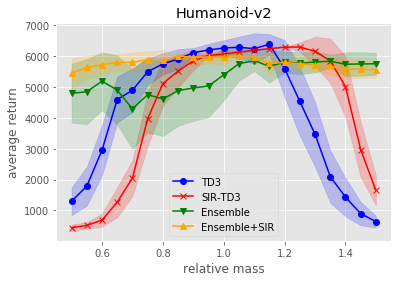

title=Humanoid-v2		 legend=TD3		 area=1853.010498046875
title=Humanoid-v2		 legend=SIR-TD3		 area=1319.8517471313476
title=Humanoid-v2		 legend=Ensemble		 area=1409.4077911376953
title=Humanoid-v2		 legend=Ensemble+SIR		 area=1590.9949798583987


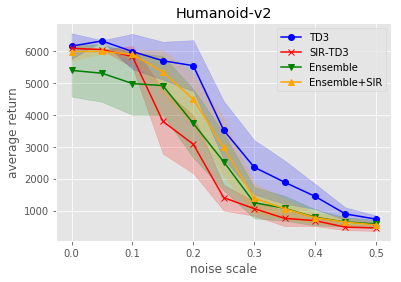

In [20]:
# comparison for ensemble training and ensemble training + SIR
def draw_mujoco_ensemble_noise_mass_result():
    def draw_figure(xs_list, ys_mean_list, ys_lower_list, ys_upper_list, legends, 
                    colors, markers, xlabel, ylabel, title, figname):
        plt.style.use('ggplot')
        plt.figure()
        for xs, ys, lower, upper, clr, mk in zip(xs_list, ys_mean_list, ys_lower_list, ys_upper_list, colors, markers):
            plt.plot(xs, ys, linewidth=1.5, color=clr, marker=mk)
            plt.fill_between(xs, lower, upper, color=clr, alpha=0.2)
        for ys, ledg in zip(ys_mean_list, legends):
            area = get_integral(ys)
            print('title={}\t\t legend={}\t\t area={}'.format(title, ledg, area))
        plt.legend(legends, loc='best')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.savefig(figname + '.png', format='png')
        plt.show()
        plt.close()
        
    log_filename_mass_td3 = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_mass_all.log'
    log_filename_noise_td3 = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_noise_all.log'
    log_filename_mass_adv = '/home/ymx/Documents/newcodes/Fujimoto_TD3_adv_test/logs/eval_mass_all.log'
    log_filename_noise_adv = '/home/ymx/Documents/newcodes/Fujimoto_TD3_adv_test/logs/eval_noise_all.log'
    log_filename_mass_ensemble = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble/logs/eval_mass_all.log'
    log_filename_noise_ensemble = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble/logs/eval_noise_all.log'
    log_filename_mass_sir = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble_regularized/logs/eval_mass_all.log'
    log_filename_noise_sir = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble_regularized/logs/eval_noise_all.log'
    env_name_list = ['LunarLanderContinuous-v2', 'Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2']
    td3_loginfo_mass = log2dict(log_filename_mass_td3)
    td3_loginfo_noise = log2dict(log_filename_noise_td3)
    adv_loginfo_mass = log2dict(log_filename_mass_adv)
    adv_loginfo_noise = log2dict(log_filename_noise_adv)
    ensemble_loginfo_mass = log2dict(log_filename_mass_ensemble)
    ensemble_loginfo_noise = log2dict(log_filename_noise_ensemble)
    sir_loginfo_mass = log2dict(log_filename_mass_sir)
    sir_loginfo_noise = log2dict(log_filename_noise_sir)
    
    ensemble_mass_seeds_list  = [0, 0, 1, 0, 7, 2]
    ensemble_noise_seeds_list = [0, 0, 1, 0, 7, 2]
    sir_mass_seeds_list       = [2, 8, 6, 3, 9, 4]
    sir_noise_seeds_list      = [2, 8, 1, 4, 9, 4]
    td3_seed_list_mass        = [0, 2, 2, 3, 1, 3]
    adv_seed_list_mass        = [0, 3, 0, 2, 2, 0]
    td3_seed_list_noise       = [0, 2, 2, 2, 1, 3]
    adv_seed_list_noise       = [0, 3, 0, 2, 2, 0]
    
    for idx in range(len(env_name_list)):
        env_name = env_name_list[idx]
        td3_mass_seed = td3_seed_list_mass[idx]
        adv_mass_seed = adv_seed_list_mass[idx]
        td3_noise_seed = td3_seed_list_noise[idx]
        adv_noise_seed = adv_seed_list_noise[idx]
        ens_mass_seed = ensemble_mass_seeds_list[idx]
        ens_noise_seed = ensemble_noise_seeds_list[idx]
        sir_mass_seed = sir_mass_seeds_list[idx]
        sir_noise_seed = sir_noise_seeds_list[idx]
        
        # processing mass
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(td3_mass_seed) and x['policy'] == 'td3'
        td3_xs, td3_ys, td3_ys_lower, td3_ys_upper = get_mean_std(td3_loginfo_mass, this_env_filter)
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(adv_mass_seed) and x['policy'] == 'adv'
        adv_xs, adv_ys, adv_ys_lower, adv_ys_upper = get_mean_std(adv_loginfo_mass, this_env_filter)
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(ens_mass_seed)
        ens_xs, ens_ys, ens_ys_lower, ens_ys_upper = get_mean_std(ensemble_loginfo_mass, this_env_filter)
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(sir_mass_seed)
        sir_xs, sir_ys, sir_lower, sir_upper = get_mean_std(sir_loginfo_mass, this_env_filter)
        draw_figure(xs_list=[td3_xs, adv_xs, ens_xs, sir_xs],
                    ys_mean_list=[td3_ys, adv_ys, ens_ys, sir_ys],
                    ys_lower_list=[td3_ys_lower, adv_ys_lower, ens_ys_lower, sir_lower],
                    ys_upper_list=[td3_ys_upper, adv_ys_upper, ens_ys_upper, sir_upper],
                    legends=['TD3', 'SIR-TD3', 'Ensemble', 'Ensemble+SIR'],
                    colors=['blue', 'red', 'green', 'orange'],
                    markers=['o', 'x', 'v', '^'],
                    xlabel='relative mass',
                    ylabel='average return',
                    title=env_name,
                    figname='./images/ensemble_test_{}_mass'.format(env_name))
        
        # processing noise
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(td3_noise_seed) and x['policy'] == 'td3'
        td3_xs, td3_ys, td3_ys_lower, td3_ys_upper = get_mean_std(td3_loginfo_noise, this_env_filter, xname='noise_scale')
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(adv_noise_seed) and x['policy'] == 'adv'
        adv_xs, adv_ys, adv_ys_lower, adv_ys_upper = get_mean_std(adv_loginfo_noise, this_env_filter, xname='noise_scale')
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(ens_noise_seed)
        ens_xs, ens_ys, ens_ys_lower, ens_ys_upper = get_mean_std(ensemble_loginfo_noise, this_env_filter, xname='noise_scale')
        this_env_filter = lambda x: x['env'] == env_name and x['train_seed'] == str(sir_noise_seed)
        sir_xs, sir_ys, sir_lower, sir_upper = get_mean_std(sir_loginfo_noise, this_env_filter, xname='noise_scale')
        draw_figure(xs_list=[td3_xs, adv_xs, ens_xs, sir_xs],
                    ys_mean_list=[td3_ys, adv_ys, ens_ys, sir_ys],
                    ys_lower_list=[td3_ys_lower, adv_ys_lower, ens_ys_lower, sir_lower],
                    ys_upper_list=[td3_ys_upper, adv_ys_upper, ens_ys_upper, sir_upper],
                    legends=['TD3', 'SIR-TD3', 'Ensemble', 'Ensemble+SIR'],
                    colors=['blue', 'red', 'green', 'orange'],
                    markers=['o', 'x', 'v', '^'],
                    xlabel='noise scale',
                    ylabel='average return',
                    title=env_name,
                    figname='./images/ensemble_test_{}_noise'.format(env_name))
        
        
draw_mujoco_ensemble_noise_mass_result()

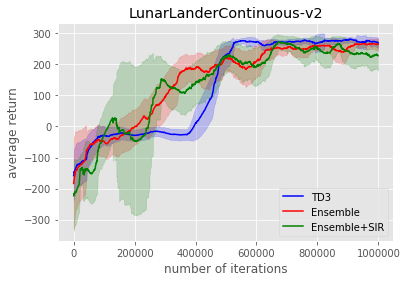

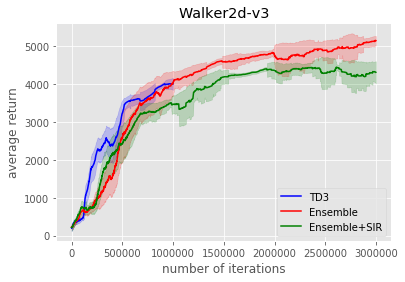

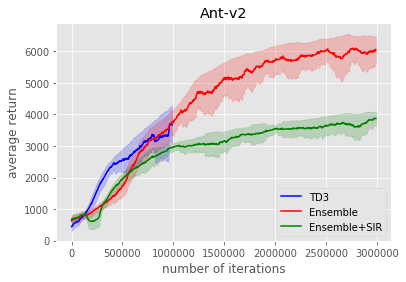

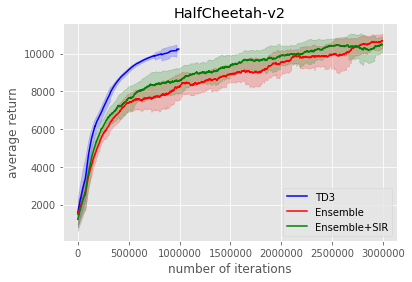

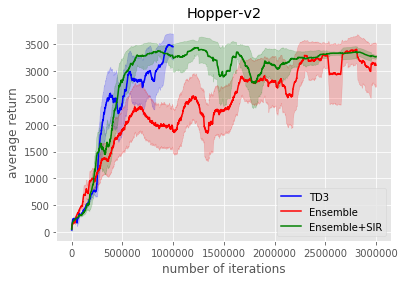

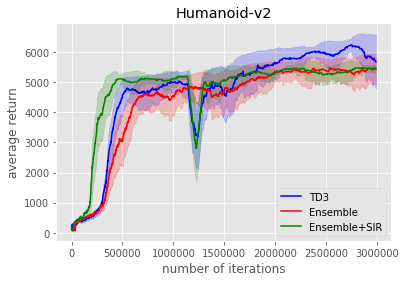

In [11]:
# draw ensemble learning curves
def draw_mujoco_ensemble_learning(smooth_func=uniform_smoothing):
    import os
    env_name_list = ['LunarLanderContinuous-v2', 'Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2']
    td3_seed_list = [0, 9, 2, 2, 3, 9]
    adv_seed_list = [1, 1, 1, 1, 1, 1]
    bak_seed_list = [0, 9, 2, 2, 3, 9]
    
    for idx, env_name in enumerate(env_name_list):
        td3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/td3_{}_{}.log'
        td3_logname = td3_logname.format(env_name, td3_seed_list[idx])
        adv_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble/logs/td3_{}_{}.log'
        adv_logname = adv_logname.format(env_name, adv_seed_list[idx])
        bak_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble_regularized/logs/adv_{}_{}.log'
        bak_logname = bak_logname.format(env_name, bak_seed_list[idx])
        
        td3_loginfo = log2dict(td3_logname)
        adv_loginfo = log2dict(adv_logname)
        bak_loginfo = log2dict(bak_logname)
        
        td3_xs = [int(x['iter']) for x in td3_loginfo]
        td3_ys = [float(x['total_reward']) for x in td3_loginfo]
        adv_xs = [int(x['iter']) for x in adv_loginfo]
        adv_ys = [float(x['total_reward']) for x in adv_loginfo]
        bak_xs = [int(x['iter']) for x in bak_loginfo]
        bak_ys = [float(x['total_reward']) for x in bak_loginfo]

        # processing mean and std
        td3_ys_mean, td3_ys_std = smooth_func(td3_ys)
        td3_lower, td3_upper = td3_ys_mean - td3_ys_std, td3_ys_mean + td3_ys_std
        adv_ys_mean, adv_ys_std = smooth_func(adv_ys)
        adv_lower, adv_upper = adv_ys_mean - adv_ys_std, adv_ys_mean + adv_ys_std
        bak_ys_mean, bak_ys_std = smooth_func(bak_ys)
        bak_lower, bak_upper = bak_ys_mean - bak_ys_std, bak_ys_mean + bak_ys_std
        
        # draw figures
        plt.figure()
        plt.plot(td3_xs, td3_ys_mean, color='blue')
        plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
        plt.plot(adv_xs, adv_ys_mean, color='red')
        plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
        plt.plot(bak_xs, bak_ys_mean, color='green')
        plt.fill_between(bak_xs, bak_lower, bak_upper, color='green', alpha=0.2)
        plt.legend(['TD3', 'Ensemble', 'Ensemble+SIR'], loc='lower right')
        plt.xlabel('number of iterations')
        plt.ylabel('average return')
        plt.title(env_name)
        plt.savefig('./images/emsemble_learning_{}.png'.format(env_name), format='png')
        plt.show()
        plt.close()
        
        
draw_mujoco_ensemble_learning()

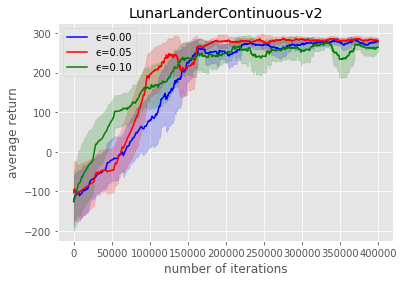

In [65]:
# comparison for the training curves of SAC and SIR-SAC
def draw_logs_learning_for_sac(log1, log2, log3, smooth_func=uniform_smoothing, env_name='LunarLanderContinuous-v2'):
    td3_xs = [int(x['iter']) for x in log1]
    td3_ys = [float(x['total_reward']) for x in log1]
    adv_xs = [int(x['iter']) for x in log2]
    adv_ys = [float(x['total_reward']) for x in log2]
    big_xs = [int(x['iter']) for x in log3]
    big_ys = [float(x['total_reward']) for x in log3]
    
    # processing mean and std
    td3_ys_mean, td3_ys_std = smooth_func(td3_ys, winsize=60)
    td3_lower, td3_upper = td3_ys_mean - td3_ys_std, td3_ys_mean + td3_ys_std
    adv_ys_mean, adv_ys_std = smooth_func(adv_ys, winsize=60)
    adv_lower, adv_upper = adv_ys_mean - adv_ys_std, adv_ys_mean + adv_ys_std
    big_ys_mean, big_ys_std = smooth_func(big_ys, winsize=60)
    big_lower, big_upper = big_ys_mean - big_ys_std, big_ys_mean + big_ys_std
    
    plt.figure()
    plt.plot(td3_xs, td3_ys_mean, color='blue')
    plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
    plt.plot(adv_xs, adv_ys_mean, color='red')
    plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
    plt.plot(big_xs, big_ys_mean, color='green')
    plt.fill_between(big_xs, big_lower, big_upper, color='green', alpha=0.2)
    plt.legend(['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'], loc='best')
    plt.xlabel('number of iterations')
    plt.ylabel('average return')
    plt.title(env_name)
    plt.savefig('./images/sac_{}_learning_comp.png'.format(env_name), format='png')
    plt.show()
    plt.close()
    
    
log_filename_sac = '/home/ymx/Documents/newcodes/pytorch_sac/logs/LunarLanderContinuous-v2/Gaussian_LunarLanderContinuous-v2_123456.log'
log_filename_sir = '/home/ymx/Documents/newcodes/pytorch_sac_adv/logs/LunarLanderContinuous-v2/Gaussian_LunarLanderContinuous-v2_123456.log'
log_filename_big = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/LunarLanderContinuous-v2/Gaussian_LunarLanderContinuous-v2_123456.log'
loginfo_sac = log2dict(log_filename_sac)
loginfo_sir = log2dict(log_filename_sir)
loginfo_big = log2dict(log_filename_big)
draw_logs_learning_for_sac(loginfo_sac, loginfo_sir, loginfo_big)

 [*] SAC	(0.00)		254.53241958618167
 [*] SIR-SAC	(0.05)		251.62390727996834
 [*] SIR-SAC	(0.10)		194.49907112121585


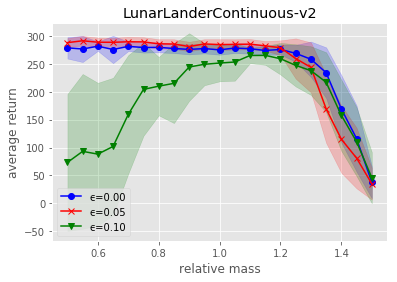

 [*] SAC	(0.00)		21.26948485374451
 [*] SIR-SAC	(0.05)		32.672204852104194
 [*] SIR-SAC	(0.10)		-10.349198722839358


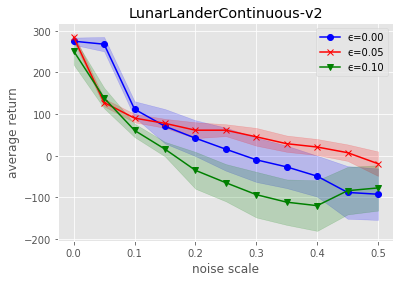

In [75]:
def draw_sac_mass_noise_logs():
    def draw_figure(sac_loginfo, sir_loginfo, bak_loginfo, 
                    xname='relative_mass', env_name='LunarLanderContinuous-v2'):
        filter_func = lambda x: x['test_seed'] == '0'
        filter_func_bak = lambda x: x['test_seed'] == '123456'
        sac_xs, sac_ys, sac_lower, sac_upper = get_mean_std(sac_loginfo, filter_func, xname=xname)
        sir_xs, sir_ys, sir_lower, sir_upper = get_mean_std(sir_loginfo, filter_func, xname=xname)
        bak_xs, bak_ys, bak_lower, bak_upper = get_mean_std(bak_loginfo, filter_func_bak, xname=xname)
        sac_area = get_integral(sac_ys)
        sir_area = get_integral(sir_ys)
        bak_area = get_integral(bak_ys)
        print(' [*] SAC\t(0.00)\t\t{}'.format(sac_area))
        print(' [*] SIR-SAC\t(0.05)\t\t{}'.format(sir_area))
        print(' [*] SIR-SAC\t(0.10)\t\t{}'.format(bak_area))
        plt.figure()
        plt.plot(sac_xs, sac_ys, color='blue', marker='o')
        plt.fill_between(sac_xs, sac_lower, sac_upper, color='blue', alpha=0.2)
        plt.plot(sir_xs, sir_ys, color='red', marker='x')
        plt.fill_between(sir_xs, sir_lower, sir_upper, color='red', alpha=0.2)
        plt.plot(bak_xs, bak_ys, color='green', marker='v')
        plt.fill_between(bak_xs, bak_lower, bak_upper, color='green', alpha=0.2)
        plt.legend(['ϵ=0.00', 'ϵ=0.05', 'ϵ=0.10'], loc='best')
        plt.xlabel(' '.join(xname.split('_')))
        plt.ylabel('average return')
        plt.title(env_name)
        plt.savefig('./images/sac_{}_{}.png'.format(xname, env_name), format='png')
        plt.show()
        plt.close()
        
    sac_logname_mass = '/home/ymx/Documents/newcodes/pytorch_sac/logs/eval_mass_all.log'
    sac_logname_noise = '/home/ymx/Documents/newcodes/pytorch_sac/logs/eval_noise_all.log'
    sir_logname_mass = '/home/ymx/Documents/newcodes/pytorch_sac_adv/logs/eval_mass_all.log'
    sir_logname_noise = '/home/ymx/Documents/newcodes/pytorch_sac_adv/logs/eval_noise_all.log'
    bak_logname_mass = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/eval_mass_all.log'
    bak_logname_noise = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/eval_noise_all.log'

    sac_loginfo_mass  = log2dict(sac_logname_mass)
    sac_loginfo_noise = log2dict(sac_logname_noise)
    sir_loginfo_mass  = log2dict(sir_logname_mass)
    sir_loginfo_noise = log2dict(sir_logname_noise)
    bak_loginfo_mass  = log2dict(bak_logname_mass)
    bak_loginfo_noise = log2dict(bak_logname_noise)
    
    draw_figure(sac_loginfo_mass, sir_loginfo_mass, bak_loginfo_mass)
    draw_figure(sac_loginfo_noise, sir_loginfo_noise, bak_loginfo_noise, xname='noise_scale')
    
    
draw_sac_mass_noise_logs()

# Here we start some SAC experiments

The images are saved as `pdf` and `png` types, where
- pdf directory: http://49.52.10.98:6789/tree/Documents/newcodes/pytorch_sac/images/scalars
- png directory: http://49.52.10.98:6789/tree/Documents/newcodes/pytorch_sac/images/pngs

**Note:** The experimental results on 6 environments are jointly plotted in a single figure.

In [53]:
import pandas as pd

# stddev of the 10 seeds
def get_seeds_stddev():
    def get_seeds_mean_std(loginfo, envname):
        envinfo = [line for line in loginfo if line['env'] == envname]
        mean_info = [float(line['result'].split('±')[0]) for line in envinfo]
        stdinfo = [float(line['result'].split('±')[-1]) for line in envinfo]
        meanstd = np.array(mean_info).std()
        stdmean = np.array(stdinfo).mean()
        return meanstd, stdmean
        
    env_names = ['Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2']
    dframe = pd.DataFrame(columns=['name', 'algo', 'meanstd', 'stdmean'])
    td3_log_name = '/home/ymx/Documents/newcodes/Fujimoto_TD3/logs_td3/evaluate.log'
    adv_log_name = '/home/ymx/Documents/newcodes/Fujimoto_TD3_adv_test/logs/evaluate.log'
    bak_log_name = '/home/ymx/Documents/newcodes/Fujimoto_TD3_baseline/logs/evaluate.log'
    sac_log_name = '/home/ymx/Documents/newcodes/pytorch_sac/logs/evaluate.log'
    sac_adv_name = '/home/ymx/Documents/newcodes/pytorch_sac_adv/logs/evaluate.log'
    td3_loginfo = log2dict(td3_log_name)
    adv_loginfo = log2dict(adv_log_name)
    bak_loginfo = log2dict(bak_log_name)
    sac_loginfo = log2dict(sac_log_name)
    sac_loginfo_adv = log2dict(sac_adv_name)
    for env in env_names:
        meanstd, stdmean = get_seeds_mean_std(td3_loginfo, env)
        dframe = dframe.append({'name': env, 'algo': 'td3', 'meanstd': meanstd, 'stdmean': stdmean}, ignore_index=True)
        meanstd, stdmean = get_seeds_mean_std(adv_loginfo, env)
        dframe = dframe.append({'name': env, 'algo': 'adv', 'meanstd': meanstd, 'stdmean': stdmean}, ignore_index=True)
        meanstd, stdmean = get_seeds_mean_std(bak_loginfo, env)
        dframe = dframe.append({'name': env, 'algo': 'bak', 'meanstd': meanstd, 'stdmean': stdmean}, ignore_index=True)
        meanstd, stdmean = get_seeds_mean_std(sac_loginfo, env)
        dframe = dframe.append({'name': env, 'algo': 'sac', 'meanstd': meanstd, 'stdmean': stdmean}, ignore_index=True)
        meanstd, stdmean = get_seeds_mean_std(sac_loginfo_adv, env)
        dframe = dframe.append({'name': env, 'algo': 'sirsac', 'meanstd': meanstd, 'stdmean': stdmean}, ignore_index=True)
    return dframe


print(get_seeds_stddev())

              name    algo      meanstd     stdmean
0      Walker2d-v3     td3   473.039173  222.640679
1      Walker2d-v3     adv   169.461092   64.646886
2      Walker2d-v3     bak   559.427641  124.449042
3      Walker2d-v3     sac   742.905289   38.855895
4      Walker2d-v3  sirsac   651.858184   72.827883
5           Ant-v2     td3   371.958291  219.399553
6           Ant-v2     adv  1240.142578  310.587662
7           Ant-v2     bak   879.116130  120.374912
8           Ant-v2     sac   145.664841  348.953899
9           Ant-v2  sirsac   763.267204  450.942755
10  HalfCheetah-v2     td3  1473.036757  130.267932
11  HalfCheetah-v2     adv   295.719481   55.458434
12  HalfCheetah-v2     bak  1009.016738   70.412254
13  HalfCheetah-v2     sac   505.010709  193.971671
14  HalfCheetah-v2  sirsac   788.284502  311.646865
15       Hopper-v2     td3   149.741635   23.148129
16       Hopper-v2     adv  1373.562546    7.184724
17       Hopper-v2     bak   607.903350   27.037208
18       Hop

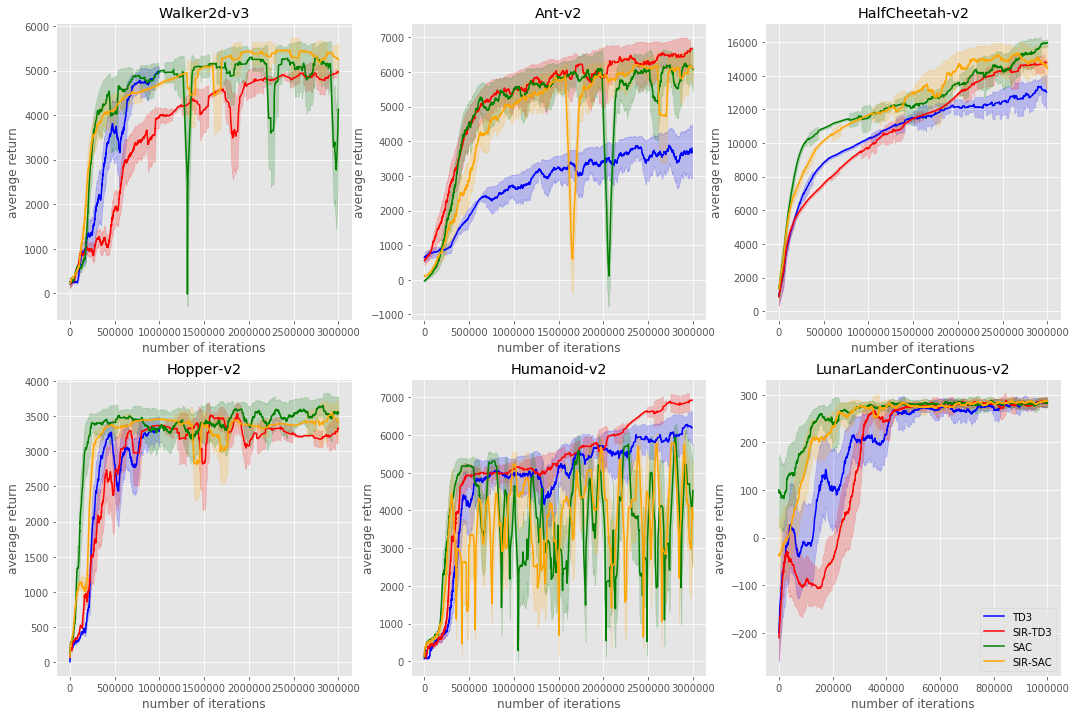

In [5]:
import matplotlib.pyplot as plt

# comparison NT and HV between TD3 | SIR-TD3 | SAC | SIR-SAC
def compare_td3_sac():
    env_names = ['Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2', 'LunarLanderContinuous-v2']
    td3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs_bak/td3_{}_{}.log'
    sirtd3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_action_robust/logs/adv_{}_{}.log'
    sac_logname = '/home/ymx/Documents/newcodes/pytorch_sac/logs/{}/Gaussian_{}_{}.log'
    sirsac_logname = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/{}/Gaussian_{}_{}.log'
    td3_seeds    = [7, 2, 0, 5, 3, 4]
    sirtd3_seeds = [1, 0, 2, 8, 4, 4]
    sac_seeds    = [4, 4, 4, 2, 0, 0]
    sirsac_seeds = [5, 2, 2, 0, 1, 0]
    
    save_dir = '/home/ymx/Documents/newcodes/pytorch_sac/images/'
    plt.figure(figsize=(18, 12))
    for it in range(6):
        env = env_names[it]
        td3_loginfo = log2dict(td3_logname.format(env, td3_seeds[it]))
        sirtd3_loginfo = log2dict(sirtd3_logname.format(env, sirtd3_seeds[it]))
        sac_loginfo = log2dict(sac_logname.format(env, env, sac_seeds[it]))
        sirsac_loginfo = log2dict(sirsac_logname.format(env, env, sirsac_seeds[it]))
        
        td3_xs = [int(x['iter']) for x in td3_loginfo]
        td3_ys = [float(x['total_reward']) for x in td3_loginfo]
        adv_xs = [int(x['iter']) for x in sirtd3_loginfo]
        adv_ys = [float(x['total_reward']) for x in sirtd3_loginfo]
        sac_xs = [int(x['iter']) for x in sac_loginfo]
        sac_ys = [float(x['total_reward']) for x in sac_loginfo]
        sir_xs = [int(x['iter']) for x in sirsac_loginfo]
        sir_ys = [float(x['total_reward']) for x in sirsac_loginfo]
        
        # processing mean and std
        td3_ys_mean, td3_ys_std = uniform_smoothing(td3_ys)
        td3_lower, td3_upper = td3_ys_mean - td3_ys_std, td3_ys_mean + td3_ys_std
        adv_ys_mean, adv_ys_std = uniform_smoothing(adv_ys)
        adv_lower, adv_upper = adv_ys_mean - adv_ys_std, adv_ys_mean + adv_ys_std
        sac_ys_mean, sac_ys_std = uniform_smoothing(sac_ys)
        sac_lower, sac_upper = sac_ys_mean - sac_ys_std, sac_ys_mean + sac_ys_std
        sir_ys_mean, sir_ys_std = uniform_smoothing(sir_ys)
        sir_lower, sir_upper = sir_ys_mean - sir_ys_std, sir_ys_mean + sir_ys_std
        
        plt.subplot(2, 3, it + 1)
#         plt.subplots_adjust(left=0.09, right=1, wspace=0.25, hspace=0.25, bottom=0.13, top=0.91)
        plt.plot(td3_xs, td3_ys_mean, color='blue')
        plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
        plt.plot(adv_xs, adv_ys_mean, color='red')
        plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
        plt.plot(sac_xs, sac_ys_mean, color='green')
        plt.fill_between(sac_xs, sac_lower, sac_upper, color='green', alpha=0.2)
        plt.plot(sir_xs, sir_ys_mean, color='orange')
        plt.fill_between(sir_xs, sir_lower, sir_upper, color='orange', alpha=0.2)
        if it == 5:
            plt.legend(['TD3', 'SIR-TD3', 'SAC', 'SIR-SAC'], loc='best')
        plt.xlabel('number of iterations')
        plt.ylabel('average return')
        plt.title(env)
        
    plt.savefig(os.path.join(save_dir, 'pngs/td3_sac_learning_curves.png'), format='png')
    plt.savefig(os.path.join(save_dir, 'scalars/td3_sac_learning_curves.pdf'), format='pdf')
    plt.show()
    plt.close()
    
    
compare_td3_sac()

Interpretation:

- The SIR can reduce the learning efficiency in the early training process, but the models with SIR are able to reach at least comparable performance after the convergence.
- Note that the learning curves can not fully reflect the final performance. If one adopts deterministic polcies during the execution, the performance will typically be higher, as reported in the original SAC paper. The evaluation results of deterministic policies are shown as follows.

In [80]:
def dframe_deterministic_summaries():
    env_names = ['Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2', 'LunarLanderContinuous-v2']
    td3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs_bak/evaluate.log'
    sirtd3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_action_robust/logs/evaluate.log'
    sac_logname = '/home/ymx/Documents/newcodes/pytorch_sac/logs/evaluate.log'
    sirsac_logname = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/evaluate.log'
    ens_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble/logs/evaluate.log'
    sirens_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_ensemble_regularized/logs/evaluate.log'
    
    td3_loginfo = log2dict(td3_logname)
    sirtd3_loginfo = log2dict(sirtd3_logname)
    sac_loginfo = log2dict(sac_logname)
    sirsac_loginfo = log2dict(sirsac_logname)
    ens_loginfo = log2dict(ens_logname)
    sirens_loginfo = log2dict(sirens_logname)
    
    columns = ['env', 'algo', 'reward_mean', 'reward_half_std', 'seeds_std']
    dframe = pd.DataFrame(columns=columns)
    for env in env_names:
        this_env_td3 = [line for line in td3_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_td3])
        reward_mean = round(float(this_env_td3[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_td3[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_td3]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'td3', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
        
        this_env_sirtd3 = [line for line in sirtd3_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_sirtd3])
        reward_mean = round(float(this_env_sirtd3[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_sirtd3[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_sirtd3]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'sir-td3', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
        
        this_env_ens = [line for line in ens_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_ens])
        reward_mean = round(float(this_env_ens[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_ens[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_ens]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'td3-ens', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
        
        this_env_sirens = [line for line in sirens_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_sirens])
        reward_mean = round(float(this_env_sirens[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_sirens[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_sirens]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'sir-ens', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
        
        this_env_sac    = [line for line in sac_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_sac])
        reward_mean = round(float(this_env_sac[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_sac[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_sac]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'sac', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
        
        this_env_sirsac = [line for line in sirsac_loginfo if line['env'] == env]
        max_idx = np.argmax([float(line['result'].split('±')[0]) for line in this_env_sirsac])
        reward_mean = round(float(this_env_sirsac[max_idx]['result'].split('±')[0]), 2)
        reward_std = round(float(this_env_sirsac[max_idx]['result'].split('±')[-1]), 2)
        seeds_std = round(np.array([float(line['result'].split('±')[0]) for line in this_env_sirsac]).std(), 2)
        lineinfo = dict(zip(columns, [env, 'sir-sac', reward_mean, reward_std, seeds_std]))
        dframe = dframe.append(lineinfo, ignore_index=True)
    return dframe


print(dframe_deterministic_summaries())

                         env     algo  reward_mean  reward_half_std  seeds_std
0                Walker2d-v3      td3      5089.38            64.55     473.04
1                Walker2d-v3  sir-td3      5020.60             9.27     488.18
2                Walker2d-v3  td3-ens      5290.62            32.88     486.18
3                Walker2d-v3  sir-ens      4577.97            18.74     557.04
4                Walker2d-v3      sac      5496.10            50.84     742.91
5                Walker2d-v3  sir-sac      5360.81            22.03     779.92
6                     Ant-v2      td3      3748.65           526.53     371.96
7                     Ant-v2  sir-td3      7076.28            39.82     650.97
8                     Ant-v2  td3-ens      6707.29           359.38    1189.82
9                     Ant-v2  sir-ens      5922.77            39.65     543.76
10                    Ant-v2      sac      6874.99           414.15     145.66
11                    Ant-v2  sir-sac      6745.49  

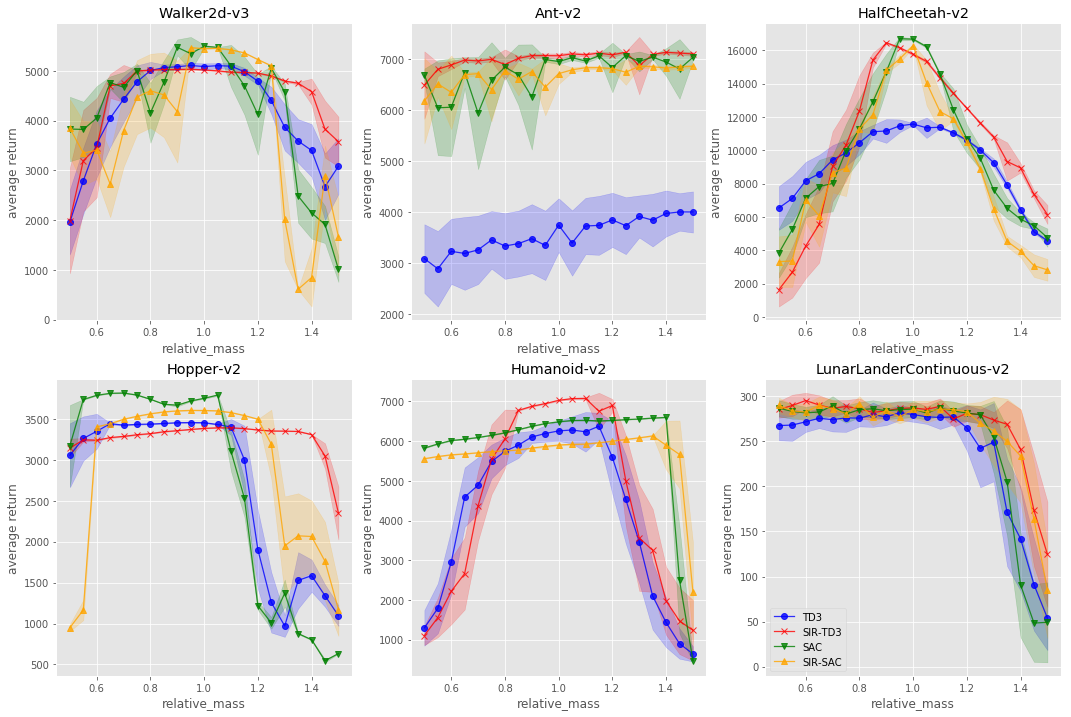

In [124]:
env_names = ['Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2', 'LunarLanderContinuous-v2']
image_save_dir = '/home/ymx/Documents/newcodes/pytorch_sac/images/'

_td3_seeds    = [7, 2, 0, 5, 3, 0]
_sirtd3_seeds = [1, 0, 2, 9, 4, 4]
_sac_seeds    = [4, 4, 4, 2, 0, 0]
_sirsac_seeds = [5, 2, 2, 0, 1, 0]

# Processing mass evaluation results
def draw_mass_td3_sac_images(expname='mass', xname='relative_mass'):
    td3_logname    = '/home/ymx/Documents/newcodes/Fujimoto_TD3_bak/logs/eval_{}_all.log'
    sirtd3_logname = '/home/ymx/Documents/newcodes/Fujimoto_TD3_action_robust/logs/eval_{}_all.log'
    sac_logname    = '/home/ymx/Documents/newcodes/pytorch_sac/logs/eval_{}_all.log'
    sirsac_logname = '/home/ymx/Documents/newcodes/pytorch_sac_bak/logs/eval_{}_all.log'
    td3_loginfo_mass     = log2dict(td3_logname.format(expname))
    sirtd3_loginfo_mass  = log2dict(sirtd3_logname.format(expname))
    sac_loginfo_mass     = log2dict(sac_logname.format(expname))
    sirsac_loginfo_mass  = log2dict(sirsac_logname.format(expname))
    
    plt.figure(figsize=(18, 12))
    for it in range(len(env_names)):
        env = env_names[it]
        this_env_filter = lambda x: x['policy'] == 'td3' and x['env'] == env and x['train_seed'] == str(_td3_seeds[it])
        td3_xs, td3_ys, td3_lower, td3_upper = get_mean_std(td3_loginfo_mass, this_env_filter, xname=xname)
        this_env_filter = lambda x: x['policy'] == 'adv' and x['env'] == env and x['train_seed'] == str(_sirtd3_seeds[it])
        adv_xs, adv_ys, adv_lower, adv_upper = get_mean_std(sirtd3_loginfo_mass, this_env_filter, xname=xname)
        this_env_filter = lambda x: x['env'] == env and x['train_seed'] == str(_sac_seeds[it])
        sac_xs, sac_ys, sac_lower, sac_upper = get_mean_std(sac_loginfo_mass, this_env_filter, xname=xname)
        this_env_filter = lambda x: x['env'] == env and x['train_seed'] == str(_sirsac_seeds[it])
        sir_xs, sir_ys, sir_lower, sir_upper = get_mean_std(sirsac_loginfo_mass, this_env_filter, xname=xname)
        
        plt.subplot(2, 3, it + 1)
        plt.plot(td3_xs, td3_ys, linewidth=1.25, color='blue', marker='o', alpha=0.8)
        plt.fill_between(td3_xs, td3_lower, td3_upper, color='blue', alpha=0.2)
        plt.plot(adv_xs, adv_ys, linewidth=1.25, color='red', marker='x', alpha=0.8)
        plt.fill_between(adv_xs, adv_lower, adv_upper, color='red', alpha=0.2)
        plt.plot(sac_xs, sac_ys, linewidth=1.25, color='green', marker='v', alpha=0.8)
        plt.fill_between(sac_xs, sac_lower, sac_upper, color='green', alpha=0.2)
        plt.plot(sir_xs, sir_ys, linewidth=1.25, color='orange', marker='^', alpha=0.8)
        plt.fill_between(sir_xs, sir_lower, sir_upper, color='orange', alpha=0.2)
        plt.xlabel(xname)
        plt.ylabel('average return')
        plt.title(env)
        if it == len(env_names) - 1:
            plt.legend(['TD3', 'SIR-TD3', 'SAC', 'SIR-SAC'], loc='best')
    plt.savefig(os.path.join(image_save_dir, 'pngs/td3_sac_eval_{}.png'.format(expname)), format='png')
    plt.savefig(os.path.join(image_save_dir, 'scalars/td3_sac_eval_{}.pdf'.format(expname)), format='pdf')
    plt.show()
    plt.close()


draw_mass_td3_sac_images()

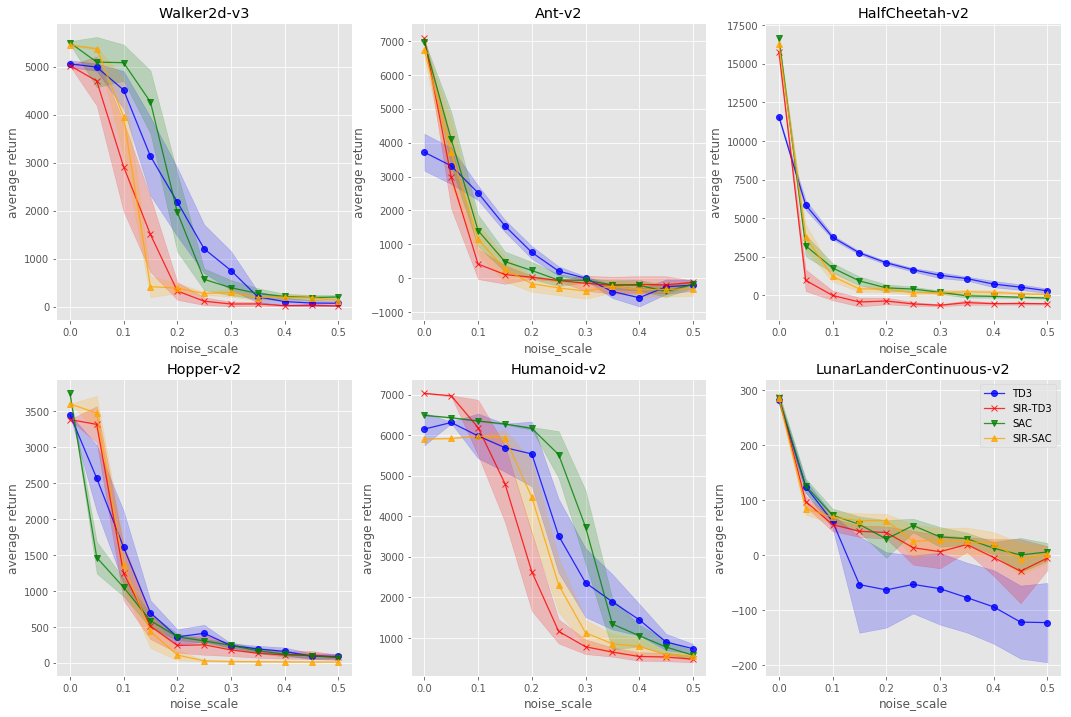

In [125]:
_td3_seeds    = [7, 2, 0, 5, 3, 0]
_sirtd3_seeds = [1, 0, 2, 9, 4, 4]
_sac_seeds    = [4, 4, 4, 2, 0, 0]
_sirsac_seeds = [5, 2, 2, 0, 1, 0]

draw_mass_td3_sac_images(expname='noise', xname='noise_scale')

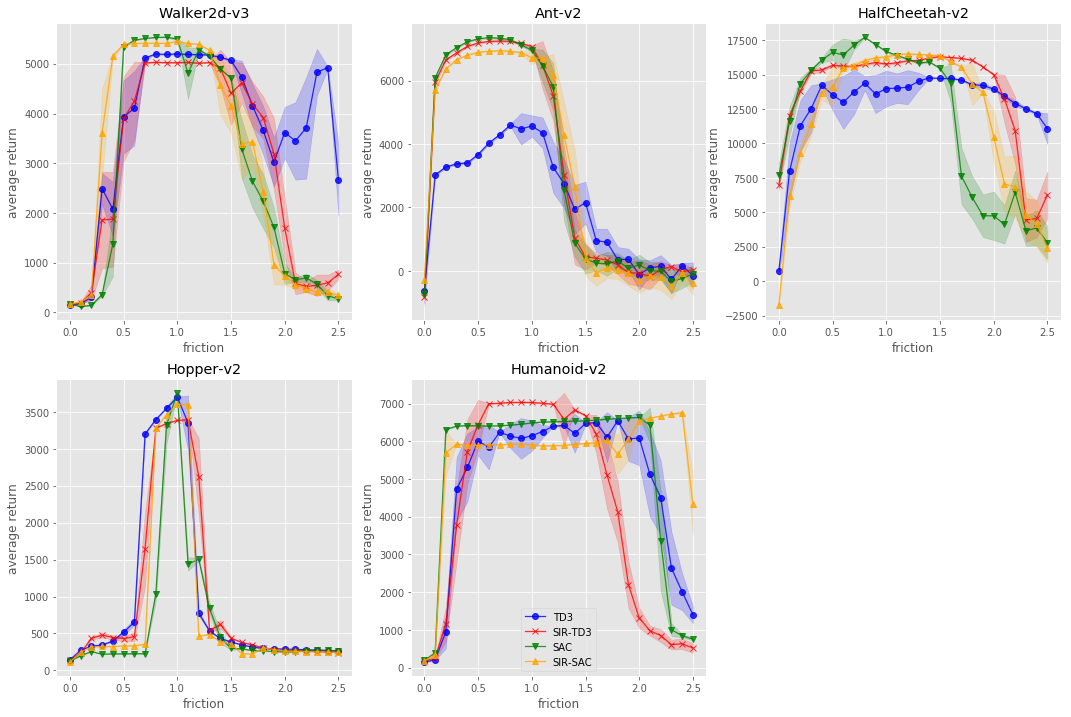

In [123]:
env_names = ['Walker2d-v3', 'Ant-v2', 'HalfCheetah-v2', 'Hopper-v2', 'Humanoid-v2']
_td3_seeds    = [7, 2, 0, 5, 3, 0]
_sirtd3_seeds = [1, 0, 2, 9, 4, 4]
_sac_seeds    = [4, 4, 4, 2, 0, 0]
_sirsac_seeds = [5, 2, 2, 0, 1, 0]

draw_mass_td3_sac_images(expname='fric', xname='friction')